## Sentiment Analysis
VADER (Valence Aware Dictionary and sEntiment Reasoner) measures polarity and strength of emotion. It is specifically attuned to social media. Documentation here: https://github.com/cjhutto/vaderSentiment

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#install other libraries for performing analysis

from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import json
import csv
import datetime

#List of subreddits
<ul>
<li>augmentedreality</li>
<li>NFTsMarketplace</li>
<li>TcgCoin</li>
<li>NFT</li>
<li>FreeNFTs</li>
<li>ethtrader</li>
<li>metaverse</li>
<li>CryptoArt</li>
<li>GravitySkins</li>
<li>CLO3D</li>
<li>DigitalFashion</li>
</ul>

#Terms to search
<ul>
<li>digital fashion</li>
<li>virtual fashion</li>
<li>vr fashion</li>
<li>virtual reality fashion</li>
<li>ar fashion</li>
<li>nft fashion</li>
<li>metaverse fashion</li>
<li>metafashion</li>
</ul>

#Brands to search
<ul>
<li>dressx</li>
<li>fortnite</li>
<li>roblox</li>
<li>opensea</li>
<li>The Fabricant</li>
<li>clo3d</li>
<li>Auroboros</li>
<li>Drest</li>
<li>The Dematerialised</li>
<li>XR Couture</li>
</ul>

In [ ]:
#Pull data from csv
reddit_dig_fashion_sentiment = pd.read_csv('/content/drive/MyDrive/Academic Research/Reddit_Analysis/Digital Fashion/csv files/combined_csv.csv')
title = reddit_dig_fashion_sentiment['Title']

print(title)

0      🌍TCG World News🌍 This week TCG World were invi...
1      🥳Sunday...Monday Funday #NFTGiveaway 🥳 To cele...
2      If you buy digital fashion to wear in AR, you ...
3      I've minted a set of 3 interactive AR NFTs. Th...
4      I'm creating AR fashion to sell as NFTs, but I...
                             ...                        
519                    Project: Fashion in the Metaverse
520    Dolce and Gabbana’s Luxury Fashion NFT Collect...
521    Join the Faceless Haute Couture Discord Server...
522                             Digital Fashion Research
523    Join the Faceless Haute Couture Discord Server...
Name: Title, Length: 524, dtype: object


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in title: #change corpus here
  pol_score = sia.polarity_scores(line)
  pol_score['headlines'] = line
  results.append(pol_score)

print(results[:5])

[{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.7213, 'headlines': '🌍TCG World News🌍 This week TCG World were invited to a VIP Digital Fashion Launch Event hosted by Gravity The Studio in London. We created this TCG World Hub trailer to showcase how their Digital Fashion will look in the Metaverse. 🥳'}, {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.7269, 'headlines': '🥳Sunday...Monday Funday #NFTGiveaway 🥳 To celebrate Gravity The Studio’s Digital Fashion #TCGWorld launch trailer we are giving away #virtualland 👐 👇Win a Silver Plot in the #Metaverse 👇 Head to Twitter to enter'}, {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.7717, 'headlines': "If you buy digital fashion to wear in AR, you want everybody to be able to view you and your virtual creation. But why own something, when it's freely available too? With this NFT that's solved: owners can pick a specific PIN number and customize one shirt https://www.hicetnunc.xyz/objkt/212631"}, {'neg': 0.0, 'neu': 0.9

In [ ]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headlines
0,0.00,0.863,0.137,0.7213,🌍TCG World News🌍 This week TCG World were invi...
1,0.00,0.816,0.184,0.7269,🥳Sunday...Monday Funday #NFTGiveaway 🥳 To cele...
2,0.00,0.812,0.188,0.7717,"If you buy digital fashion to wear in AR, you ..."
3,0.00,0.941,0.059,0.4404,I've minted a set of 3 interactive AR NFTs. Th...
4,0.09,0.784,0.126,0.2755,"I'm creating AR fashion to sell as NFTs, but I..."


In [ ]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headlines,label
0,0.00,0.863,0.137,0.7213,🌍TCG World News🌍 This week TCG World were invi...,1
1,0.00,0.816,0.184,0.7269,🥳Sunday...Monday Funday #NFTGiveaway 🥳 To cele...,1
2,0.00,0.812,0.188,0.7717,"If you buy digital fashion to wear in AR, you ...",1
3,0.00,0.941,0.059,0.4404,I've minted a set of 3 interactive AR NFTs. Th...,1
4,0.09,0.784,0.126,0.2755,"I'm creating AR fashion to sell as NFTs, but I...",1


In [ ]:
#How many of each classification of comment (0=neutral, 1=positive, -1=negative)
df.label.value_counts()

 0    280
 1    204
-1     40
Name: label, dtype: int64

In [ ]:
#same data as previous cell, just in percentage form

df.label.value_counts(normalize=True) * 100

 0    53.435115
 1    38.931298
-1     7.633588
Name: label, dtype: float64

In [ ]:
#Let's see a few examples

print('Positive:\n')
print(list(df[df['label'] == 1].headlines)[:5])

print('Negative:\n')
print(list(df[df['label'] == -1].headlines)[:5])


Positive:

['🌍TCG World News🌍 This week TCG World were invited to a VIP Digital Fashion Launch Event hosted by Gravity The Studio in London. We created this TCG World Hub trailer to showcase how their Digital Fashion will look in the Metaverse. 🥳', '🥳Sunday...Monday Funday #NFTGiveaway 🥳 To celebrate Gravity The Studio’s Digital Fashion #TCGWorld launch trailer we are giving away #virtualland 👐 👇Win a Silver Plot in the #Metaverse 👇 Head to Twitter to enter', "If you buy digital fashion to wear in AR, you want everybody to be able to view you and your virtual creation. But why own something, when it's freely available too? With this NFT that's solved: owners can pick a specific PIN number and customize one shirt https://www.hicetnunc.xyz/objkt/212631", "I've minted a set of 3 interactive AR NFTs. They all refer to one online Snap AR lens which is freely accessible. But only the owner of the NFT can activate 2 drawing colors using the PIN code which can be found in the unlockable conten

Text(0.5, 0, 'Sentiment')

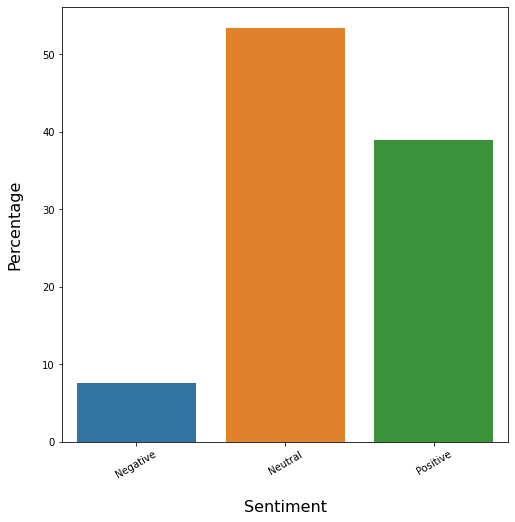

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=30)
ax.set_ylabel('Percentage', fontsize=16, labelpad=20)
ax.set_xlabel('Sentiment', fontsize=16, labelpad=20)

In [ ]:
#convert dataframe to array so it can be saved to google sheet
convert = posts.to_numpy().tolist()
headers = posts.columns.to_list()
data_to_write = [headers] + convert
print(data_to_write)

[['Title', 'Score', 'Number of Comments', 'Submission Text', 'Date Created', 'ID'], ['Looking for Digital Fashion Enthusiasts to take a 10 min survey - https://arts.eu.qualtrics.com/jfe/form/SV_5bzU8MzYuVwQzZk', 1, 0, "Hi Everyone, I am in my final year at university and for my dissertation I am conducting research on individual personalities and digital fashion use. I aim to see if theres a trend in the 'type' of person who would be more likely to consume and interact with digital fashion than those who may not. I am also looking for both males and females so I can see if there's any gender differences as stereotypically fashion research has always been aimed at females. All the requirements are that you have *an interest in physical fashion* **and/ or** *have bought digital fashion* (this can also include game skins). You must be 18-35 years of age. If you are interested in what this research is about more in depth please see the link attached for Participant Information.  \n\nLink t

In [ ]:
#save data to google sheet

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#sh = gc.create('Digital Fashion Conversation')

# Open our new sheet and add some data.
wb = gc.open_by_key('1npXfKIBmmqNQbKaXvC0e_pWTMSumd3IgcRTijV9vDHk')

ws = wb.worksheet('Digital Fashion Subreddit')

#cell_list = ws.range('A1:C2')

#import random
#for cell in cell_list:
#  cell.value = random.randint(1, 10)

#worksheet.update_cells(cell_list)
# Go to https://sheets.google.com to see your new spreadsheet.

In [ ]:
ws = wb.worksheet('Digital Fashion Subreddit')
ws.update(None, data_to_write)

{'spreadsheetId': '1npXfKIBmmqNQbKaXvC0e_pWTMSumd3IgcRTijV9vDHk',
 'updatedCells': 90,
 'updatedColumns': 6,
 'updatedRange': "'Digital Fashion Subreddit'!A1:F15",
 'updatedRows': 15}